In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import json
from robot import arena

In [6]:
poses_raw_data = """
Received data: {"poses": [[752, 337], [478, 1118], [409, 1128], [1129, 782], [1360, 930], [585, 936], [298, 186], [1057, 316], [848, 877], [1245, 1329], [138, 113], [1292, 512], [1115, 1467], [737, 1358], [1001, 1397], [1319, 781], [203, 892], [1347, 137], [616, 1330], [1472, 1045]]}
Received data: {"poses": [[951, 912], [1180, 918], [717, 704], [1265, 912], [765, 1214], [118, 847], [689, 1284], [390, 860], [785, 1067], [1291, 943], [534, 223], [824, 371], [866, 416], [313, 581], [794, 843], [757, 1353], [1281, 61], [666, 1351], [435, 13], [665, 315]]}
Received data: {"poses": [[506, 333], [1159, 536], [1529, 374], [142, 980], [278, 756], [38, 887], [483, 465], [212, 231], [1158, 495], [577, 1311], [527, 180], [668, 1191], [315, 415], [371, 928], [372, 1003], [1488, 969], [643, 520], [427, 1018], [720, 793], [1252, 744]]}
Received data: {"poses": [[842, 958], [-58, 1181], [1056, 277], [221, 564], [423, 186], [1384, 1207], [1317, 110], [1120, 399], [1063, 123], [1307, 1172], [794, 433], [1500, 1208], [999, 444], [1395, 336], [639, 1319], [670, 1586], [894, 801], [54, 241], [626, 403], [1181, 260]]}
Received data: {"poses": [[946, 1358], [733, 232], [42, 1229], [-194, 1268], [183, 776], [1569, 252], [-168, -188], [914, 1090], [1434, 980], [717, 966], [488, 2], [745, 1419], [494, 758], [426, 1237], [822, 1506], [386, 738], [1426, -194], [1381, 344], [885, 343], [162, 400]]}
Received data: {"poses": [[1589, 898], [1142, 1275], [1232, 1635], [25, 1042], [107, 350], [-116, 831], [886, 378], [1397, 1152], [870, 1125], [772, 1335], [521, 948], [1192, -222], [1514, 370], [1626, 805], [248, 958], [605, 134], [458, 1212], [225, 95], [192, 49], [1011, 1697]]}
Received data: {"poses": [[1365, 687], [1478, 550], [963, 1105], [1199, 449], [1228, 1248], [-244, 1138], [1152, 1300], [415, 1331], [302, 1085], [1505, 1357], [222, 578], [965, -73], [1300, 599], [-91, 352], [1261, 949], [1210, 1495], [1321, 529], [844, 916], [315, -446], [227, 149]]}
Received data: {"poses": [[323, 1202], [437, 315], [1300, 1717], [1279, -448], [485, 906], [713, 1072], [962, 665], [435, 44], [814, -187], [1679, 781], [234, 125], [-4, 1022], [511, 433], [780, 243], [828, 77], [1356, 444], [1344, 804], [741, 223], [745, 41], [-190, -196]]}
Received data: {"poses": [[1838, 1041], [1183, 1562], [1249, 1922], [-89, 773], [151, 68], [-354, 671], [1169, 445], [1431, 1438], [583, 1102], [610, 1571], [719, 733], [954, -382], [1664, 119], [1757, 1057], [-18, 1068], [882, 52], [433, 1498], [82, -156], [96, -225], [939, 1976]]}
Received data: {"poses": [[2, 230], [-186, 775], [356, 1875], [1117, 32], [2061, 636], [352, 1648], [632, 866], [1581, 843], [1398, 362], [572, 1662], [-497, 531], [800, 1076], [1490, 819], [515, 647], [359, 1006], [1430, 1528], [-362, 1375], [2050, 393], [89, 1864], [1902, 429]]}
Received data: {"poses": [[374, 1290], [1241, -21], [-14, 1800], [-747, 1431], [508, 311], [2120, 107], [-599, -548], [349, 1116], [1931, 725], [1228, 1216], [187, -473], [793, 1984], [741, 1274], [500, 1798], [1391, 1545], [-174, 615], [1397, -760], [1748, 773], [787, 906], [-301, 735]]}
Received data: {"poses": [[1129, -236], [1592, 1263], [2254, -74], [-277, 1702], [789, 80], [-323, 1639], [37, 1193], [-294, 893], [1246, 1337], [549, 457], [1147, -383], [629, 2048], [736, -316], [-220, 1543], [1204, 1152], [2238, 1374], [1100, -210], [310, 178], [5, 354], [1725, 42]]}
Received data: {"poses": [[1136, -239], [1593, 1270], [2261, -76], [-283, 1706], [795, 77], [-328, 1643], [32, 1197], [-299, 896], [1244, 1344], [551, 450], [1153, -385], [625, 2055], [741, -320], [-226, 1546], [1209, 1156], [2242, 1379], [1105, -214], [312, 172], [1, 349], [1731, 38]]}
Received data: {"poses": [[1169, -642], [1629, 292], [557, 260], [1581, 1188], [273, -718], [1246, 975], [1445, -454], [1218, 1211], [-378, 2194], [1306, 759], [1048, 1724], [1698, -175], [1076, 798], [1333, 557], [1756, 1211], [1128, 10], [-23, 532], [611, 1882], [2346, 591], [204, -273]]}
Received data: {"poses": [[281, 1282], [1324, -66], [-23, 1895], [-834, 1460], [557, 234], [2208, 82], [-668, -609], [254, 1120], [2011, 680], [1315, 1258], [134, -549], [801, 2078], [783, 1358], [516, 1892], [1486, 1551], [-263, 598], [1390, -853], [1811, 847], [770, 997], [-376, 794]]}
Received data: {"poses": [[2004, 1131], [1214, 1755], [1261, 2120], [-169, 593], [182, -120], [-519, 564], [1358, 479], [1458, 1632], [391, 1085], [504, 1731], [850, 586], [788, -492], [1759, -43], [1846, 1238], [-201, 1139], [1068, -2], [423, 1700], [-13, -325], [30, -406], [895, 2169]]}
Received data: {"poses": [[1701, 494], [1683, 239], [1177, 1417], [1127, 69], [1594, 1243], [-517, 1400], [1526, 1282], [450, 1712], [-77, 1121], [1706, 1676], [-6, 885], [1052, -443], [1659, 724], [-432, 186], [1639, 997], [1581, 1573], [1377, 899], [964, 567], [192, -809], [-144, 47]]}
Received data: {"poses": [[-97, 226], [-280, 738], [352, 1967], [1108, -71], [2141, 589], [327, 1736], [681, 949], [1655, 906], [1463, 287], [492, 1707], [-571, 589], [743, 1150], [1530, 732], [483, 560], [266, 964], [1446, 1616], [-434, 1447], [2149, 421], [26, 1937], [1948, 348]]}
Received data: {"poses": [[1814, 516], [-209, 1097], [612, -725], [516, 100], [649, 1583], [1668, 1423], [2310, 1114], [-789, 1326], [237, 1109], [1799, 727], [2266, 807], [-393, -475], [245, -381], [183, 473], [925, 1075], [1549, 398], [-611, -166], [805, 1814], [2239, -216], [317, 71]]}
Received data: {"poses": [[282, 1449], [1225, -205], [140, 1890], [-776, 1615], [413, 163], [2149, -69], [-773, -478], [277, 1285], [1914, 548], [1367, 1095], [4, -445], [961, 2044], [926, 1272], [672, 1850], [1473, 1385], [-282, 766], [1222, -824], [1919, 723], [940, 1001], [-260, 914]]}
Received data: {"poses": [[14, 2120], [911, 2216], [1491, 873], [932, 1715], [802, -318], [477, 1926], [1720, 2098], [315, 1452], [941, 526], [1842, 1385], [795, -120], [381, 383], [-423, 749], [-329, 375], [-563, -90], [1108, 1358], [1237, 602], [690, -206], [1698, 597], [-238, 962]]}
Received data: {"poses": [[2312, 886], [1601, 1823], [1635, 2229], [-563, 609], [-164, -301], [-823, 806], [1572, 153], [1837, 1727], [231, 1438], [720, 2047], [703, 229], [456, -284], [1532, -362], [2233, 1195], [-173, 1530], [1111, -391], [767, 1893], [-399, -251], [-366, -414], [1186, 2417]]}
Received data: {"poses": [[909, -628], [2015, 1121], [2103, -489], [78, 1989], [503, -267], [47, 1898], [379, 1485], [-21, 1238], [1686, 1359], [98, 398], [892, -758], [1077, 2167], [415, -614], [47, 1897], [1384, 735], [2525, 1029], [763, -520], [-143, 155], [-300, 679], [1393, -272]]}
Received data: {"poses": [[2466, 759], [1798, 1847], [1824, 2277], [-763, 625], [-336, -388], [-977, 938], [1677, -17], [2030, 1771], [154, 1621], [842, 2202], [618, 47], [292, -174], [1411, -523], [2435, 1165], [-150, 1729], [1129, -589], [942, 1982], [-597, -204], [-564, -414], [1343, 2538]]}
Received data: {"poses": [[2537, 699], [1893, 1853], [1917, 2298], [-853, 634], [-419, -426], [-1045, 1000], [1723, -96], [2123, 1789], [119, 1706], [903, 2274], [576, -36], [214, -120], [1352, -595], [2531, 1147], [-138, 1823], [1134, -682], [1026, 2023], [-688, -179], [-655, -413], [1418, 2591]]}
Received data: {"poses": [[1521, -261], [1244, -399], [1952, 1239], [344, 1], [1882, 520], [-205, 2136], [1726, 522], [1210, 1857], [-251, 1875], [2477, 1559], [400, 1563], [399, -880], [2161, 120], [-988, 748], [1994, 295], [2051, 928], [2148, 1034], [407, 19], [-587, -840], [-631, 674]]}
Received data: {"poses": [[-15, 2068], [1130, -889], [755, 2176], [-872, 2294], [7, -395], [2220, -763], [-1401, -192], [44, 1927], [1815, -131], [1846, 603], [-679, -299], [1621, 2237], [1611, 1228], [1342, 1987], [1743, 750], [-653, 1345], [563, -1006], [2554, 478], [1541, 1325], [-47, 1575]]}
Received data: {"poses": [[2097, -310], [398, 1734], [-42, -1306], [12, -626], [1506, 1818], [2254, 757], [2560, 275], [-910, 2212], [617, 1910], [2518, 207], [2739, 56], [-1192, -115], [-593, -86], [111, 1352], [1415, 1802], [1821, -453], [-1282, 398], [1573, 2254], [2200, -1092], [-538, 206]]}
Received data: {"poses": [[47, 2372], [-664, -223], [2425, 1304], [128, -814], [991, 1994], [1371, 37], [1741, -245], [-199, 1064], [-50, 633], [2802, 340], [-511, -824], [-309, 2216], [80, -722], [-146, 1033], [1154, -1076], [1415, -758], [390, 56], [42, 1209], [1153, -1102], [-1369, 28]]}
Received data: {"poses": [[-121, 2353], [1058, -1178], [1046, 2270], [-887, 2602], [-192, -622], [2221, -1067], [-1665, -41], [-37, 2222], [1737, -425], [2023, 363], [-967, -210], [1920, 2283], [1908, 1179], [1635, 2029], [1831, 454], [-790, 1622], [276, -1057], [2823, 342], [1825, 1432], [67, 1852]]}
Received data: {"poses": [[2170, -608], [639, 1922], [-292, -1472], [-196, -851], [1808, 1862], [2422, 505], [2619, -24], [-911, 2521], [783, 2170], [2746, -3], [2869, -214], [-1443, 47], [-863, 47], [126, 1656], [1613, 2034], [1869, -761], [-1478, 624], [1850, 2371], [2143, -1393], [-833, 284]]}
Received data: {"poses": [[1315, -810], [842, -827], [2505, 1014], [-249, 34], [2037, -53], [104, 2652], [1791, -76], [1799, 1871], [-319, 2468], [3054, 1402], [776, 2020], [-131, -1153], [2442, -399], [-1326, 1231], [2189, -260], [2348, 407], [2745, 1030], [-82, -307], [-1167, -763], [-935, 1175]]}
Received data: {"poses": [[862, 2955], [2066, 1949], [2685, 873], [1944, 1108], [421, -1459], [426, 3103], [2908, 1987], [763, 2547], [984, -666], [2756, 621], [-404, -130], [-639, -255], [-1353, 1485], [-1253, 1120], [-1520, 630], [2099, 684], [700, -467], [-484, -328], [2600, -170], [78, 2108]]}
Received data: {"poses": [[1232, -992], [698, -962], [2680, 929], [-447, 59], [2074, -248], [214, 2815], [1801, -273], [1995, 1858], [-332, 2664], [3237, 1340], [914, 2161], [-312, -1228], [2515, -577], [-1422, 1405], [2241, -453], [2434, 227], [2946, 1014], [-251, -401], [-1366, -723], [-1029, 1354]]}
Received data: {"poses": [[3164, 49], [2802, 1854], [2809, 2404], [-1742, 783], [-1264, -744], [-1649, 1672], [2123, -896], [3022, 1862], [-134, 2578], [1553, 2898], [71, -782], [-470, 464], [712, -1232], [3385, 897], [82, 2690], [1101, -1586], [1877, 2291], [-1524, 135], [-1539, -301], [2200, 3034]]}
Received data: {"poses": [[3164, 48], [2802, 1854], [2809, 2403], [-1742, 784], [-1265, -744], [-1649, 1672], [2122, -896], [3022, 1861], [-133, 2578], [1553, 2898], [71, -782], [-469, 464], [712, -1231], [3385, 896], [83, 2690], [1101, -1586], [1877, 2290], [-1524, 135], [-1539, -301], [2200, 3034]]}
Received data: {"poses": [[935, 3015], [2156, 1917], [2782, 865], [2024, 1046], [382, -1549], [432, 3200], [3004, 1969], [810, 2633], [978, -760], [2821, 544], [-500, -118], [-726, -298], [-1425, 1553], [-1325, 1184], [-1590, 696], [2173, 620], [647, -549], [-581, -329], [2667, -241], [117, 2200]]}
Received data: {"poses": [[2200, -806], [811, 2042], [-468, -1566], [-351, -993], [2014, 1879], [2521, 323], [2645, -230], [-895, 2729], [906, 2326], [2887, -157], [2937, -410], [-1602, 169], [-1041, 162], [160, 1859], [1762, 2172], [1879, -966], [-1601, 796], [2043, 2436], [2084, -1584], [-1025, 349]]}
Received data: {"poses": [[3024, 196], [2604, 1837], [2611, 2359], [-1548, 756], [-1078, -659], [-1518, 1526], [2026, -719], [2825, 1836], [-65, 2392], [1415, 2753], [176, -614], [-321, 334], [849, -1087], [3188, 946], [30, 2498], [1106, -1384], [1685, 2235], [-1334, 75], [-1339, -326], [2027, 2929]]}
Received data: {"poses": [[1390, 2455], [-1238, 2240], [1093, 1914], [-1346, 827], [783, -1404], [548, -131], [-241, 643], [1774, -1014], [-91, -991], [2721, 1936], [-62, -890], [2968, 629], [2567, 727], [87, -686], [-908, 1757], [1721, 2785], [-489, 119], [-1270, 1119], [-344, -884], [506, -1163]]}
Received data: {"poses": [[233, -1325], [877, -568], [7, 1238], [1720, 40], [-697, -1298], [1473, -159], [457, -1083], [1765, 217], [516, 2924], [610, -155], [2047, 1193], [641, -630], [358, -128], [523, -254], [2541, 391], [7, -187], [-374, 1609], [1151, 2913], [2593, -524], [-652, 483]]}
"""

In [7]:
poses_lines = poses_raw_data.split("\n")
poses_lines = [line.replace("Received data: ", "") for line in poses_lines if line]
len(poses_lines)

41

In [8]:
poses_dicts = [json.loads(line) for line in poses_lines]
poses_over_time = np.array([poses_dict["poses"] for poses_dict in poses_dicts])
# ThreeD array = time, pose number, [x, y]
poses_over_time[0,0]

array([752, 337])

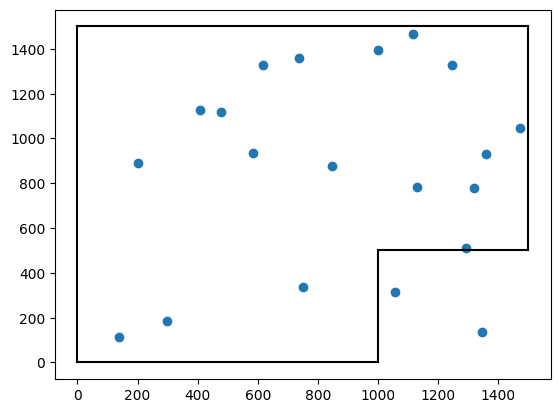

In [16]:
fig, ax = plt.subplots()

time_index = 0
ax.scatter(poses_over_time[time_index, :, 0], poses_over_time[time_index, :, 1])
for line in arena.boundary_lines:
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color="black")

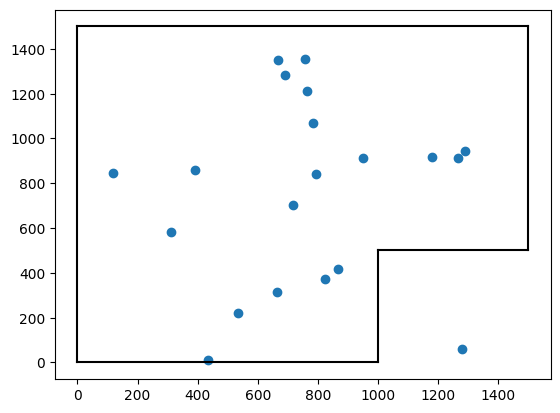

In [17]:
fig, ax = plt.subplots()

time_index = 1
ax.scatter(poses_over_time[time_index, :, 0], poses_over_time[time_index, :, 1])
for line in arena.boundary_lines:
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color="black")

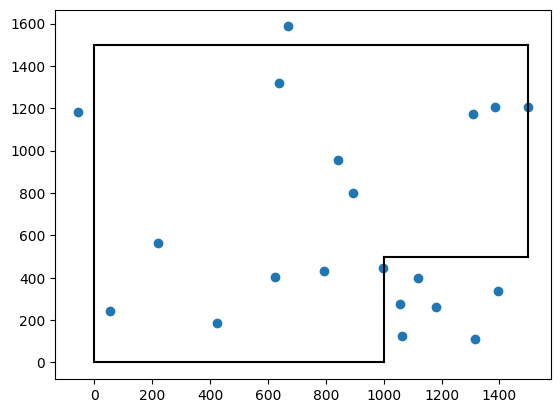

In [18]:
fig, ax = plt.subplots()

time_index = 3
ax.scatter(poses_over_time[time_index, :, 0], poses_over_time[time_index, :, 1])
for line in arena.boundary_lines:
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color="black")